In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from imblearn.over_sampling import SMOTE  
smote=SMOTE()
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report
 #Run this to avoid silent warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection  import RFE
from sklearn.tree import DecisionTreeClassifier



In [2]:
data_emp=pd.read_csv(r"C:\\Edubrige\\Project\\employee_churn_data.csv")

In [3]:
data_emp.head(5)


,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [4]:
data_emp.duplicated().sum()


0

In [5]:
data_emp.dtypes

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
left              object
dtype: object

In [6]:
data_emp.promoted.value_counts()

promoted
0    9251
1     289
Name: count, dtype: int64

In [7]:
data_emp.shape

(9540, 10)

In [8]:
data_emp.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [9]:
data_emp.left.value_counts()

left
no     6756
yes    2784
Name: count, dtype: int64

In [10]:
data = data_emp.copy()  # Making a copy to avoid modifying the original DataFrame


In [11]:
data_emp.bonus.value_counts()

bonus
0    7517
1    2023
Name: count, dtype: int64

# Data cleaning 

In [12]:
data['department'] = le.fit_transform(data['department']) # dtype conversion
data['salary'] = le.fit_transform(data['salary']) # dtype conversion
data['left'] = le.fit_transform(data['left']) # dtype conversion


In [13]:
data.head(2)  # 0 Means not left and 1 means left

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,6,0,0.577569,3,1,5.0,0.626759,0,180.866070,0
1,6,0,0.751900,3,2,6.0,0.443679,0,182.708149,0


# Visualization

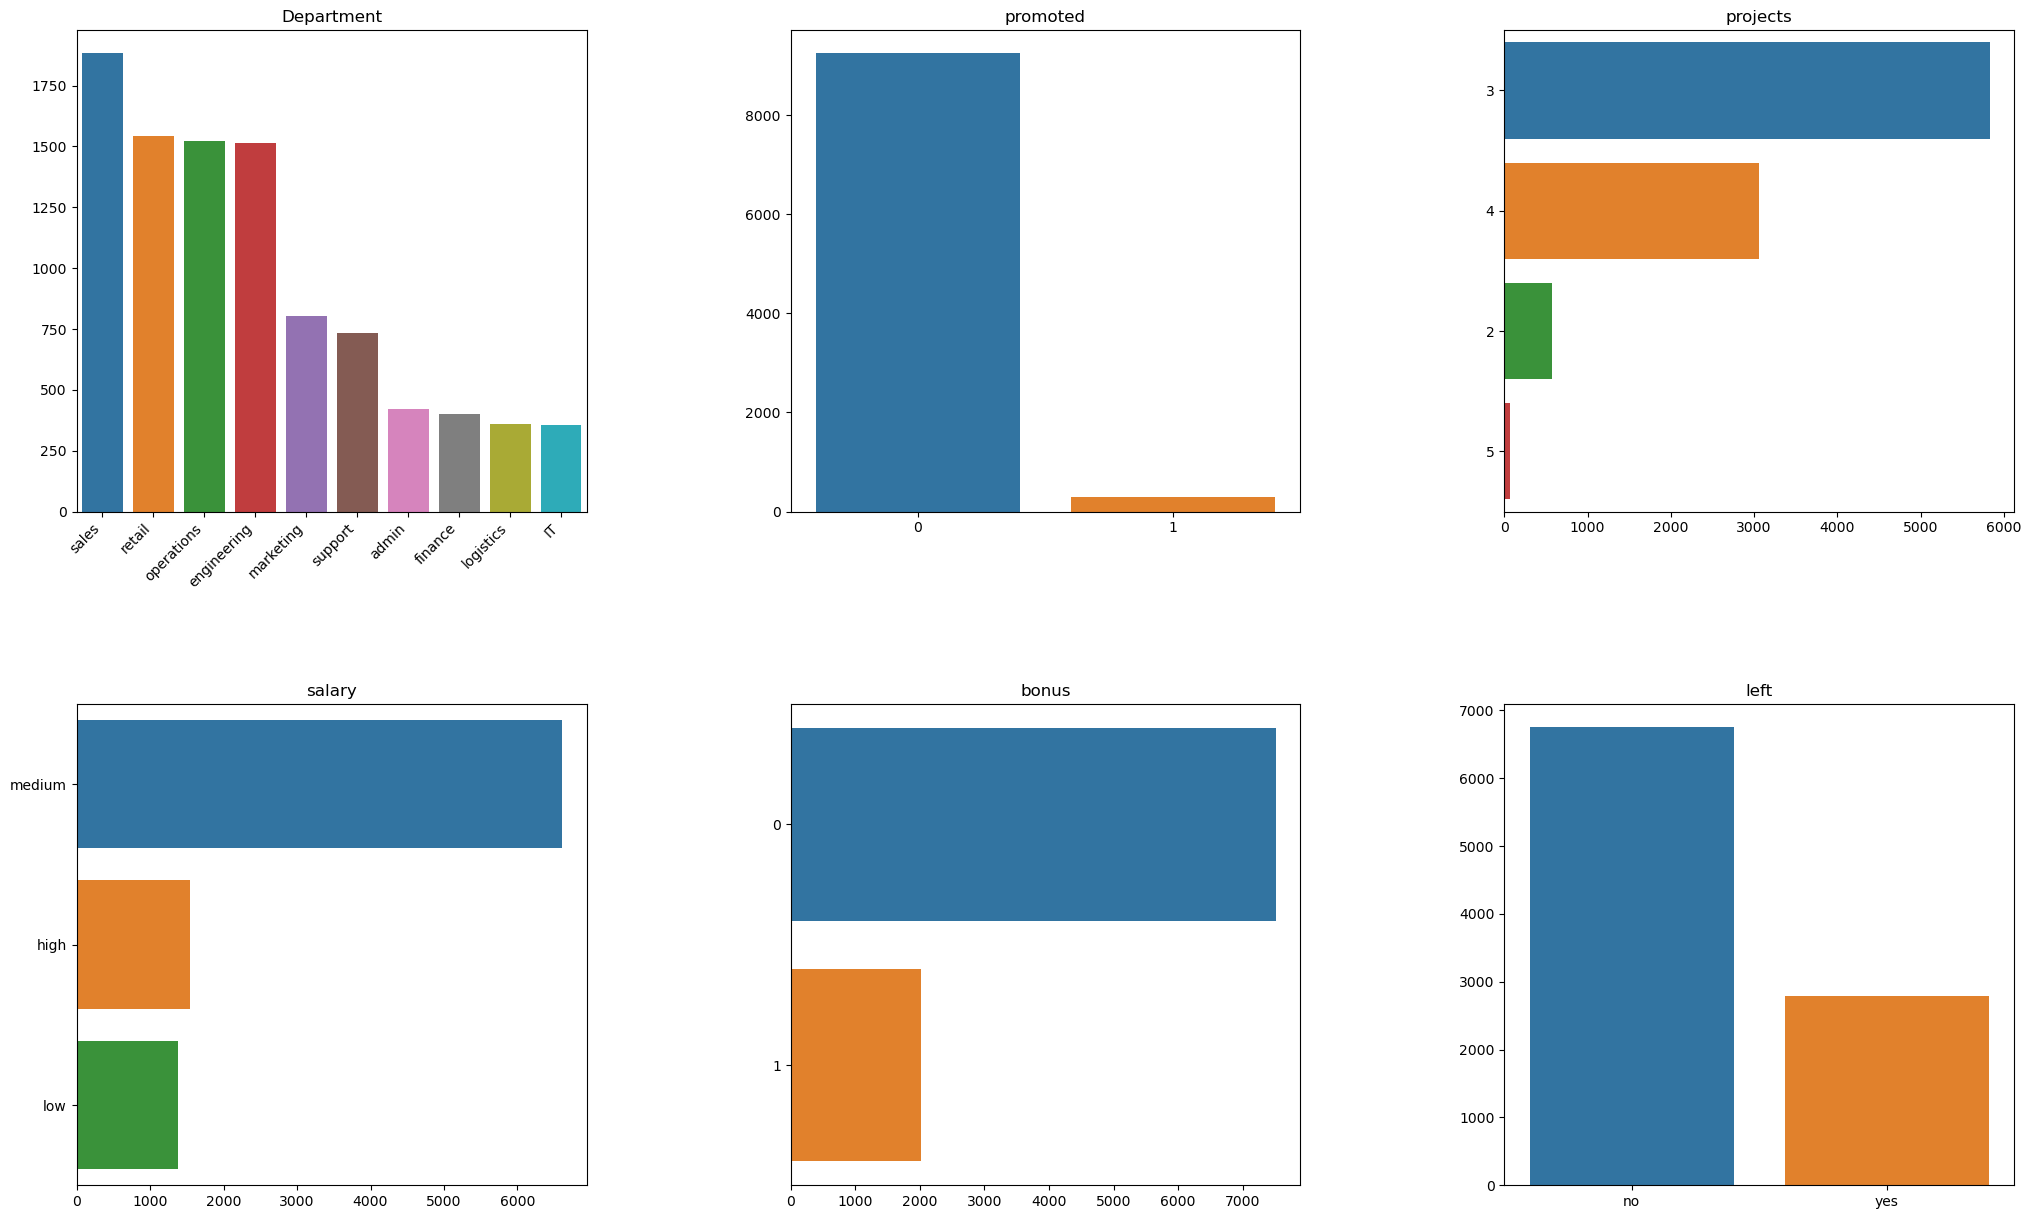

In [14]:
figure, axis = plt.subplots(ncols=3, nrows=2, figsize=(25,15))
plt.subplots_adjust(hspace = 0.4, wspace=0.4)

order = data_emp['department'].value_counts().index

# Creating the countplot with tilted x-axis labels
g = sns.countplot(data=data_emp, x='department', ax=axis[0, 0], order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')  # Rotating the x-axis labels by 45 degrees because of clubsy
g.set_title('Department')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, x='promoted', ax=axis[0, 1], order = data_emp['promoted'].value_counts().index)
g.title.set_text('promoted')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, y='projects', ax=axis[0, 2],order = data_emp['projects'].value_counts().index)
g.title.set_text('projects')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, y='salary', ax=axis[1, 0], order = data_emp['salary'].value_counts().index)
g.title.set_text('salary')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, y='bonus', ax=axis[1, 1], order = data_emp['bonus'].value_counts().index)
g.title.set_text('bonus')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, x='left', ax=axis[1, 2], order = data_emp['left'].value_counts().index)
g.title.set_text('left')
g.set(xlabel='')
g.set(ylabel='')


plt.show()


In [15]:
c=data.corr()

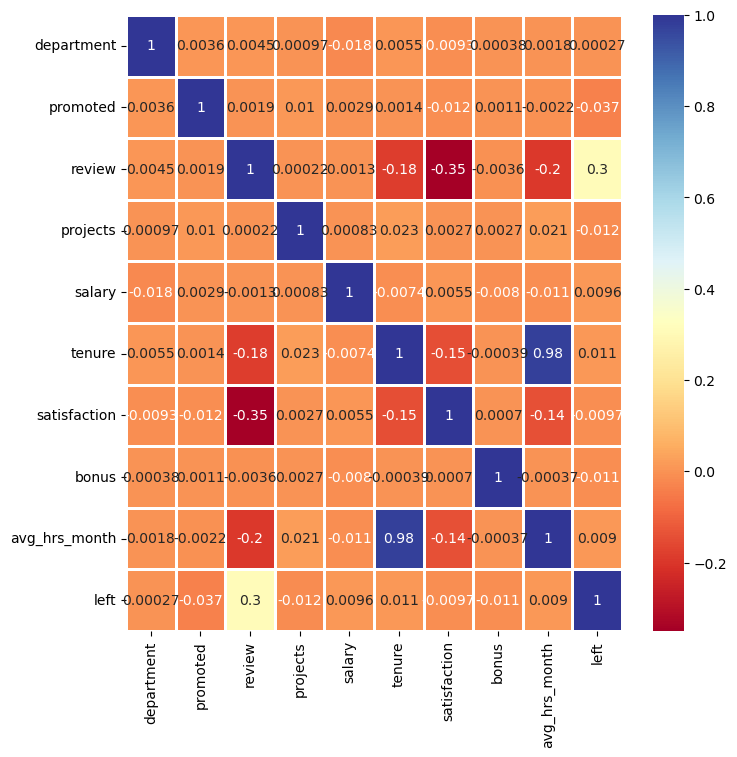

In [16]:
plt.figure(figsize=(8,8))
heatmap=sns.heatmap(c,linewidth=1 ,annot=True ,cmap=plt.cm.RdYlBu)

In [17]:
def hist_box_plots(data_emp, col, bins='auto'):
    figure, axis = plt.subplots(ncols=2, figsize=(11,3))

    sns.histplot(data=data_emp, x=col, ax=axis[0], bins=bins)
    sns.boxplot(data=data_emp, x=col, ax=axis[1])

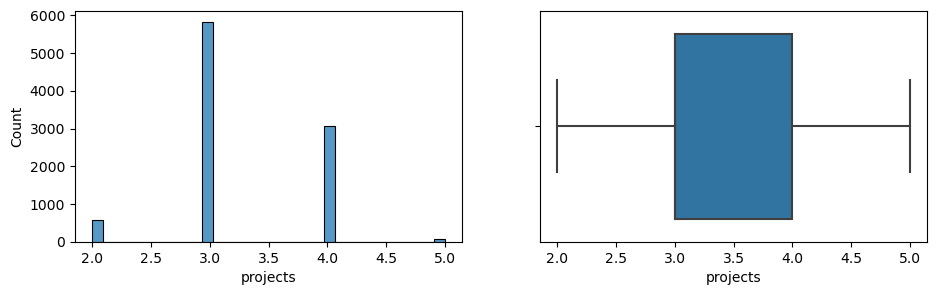

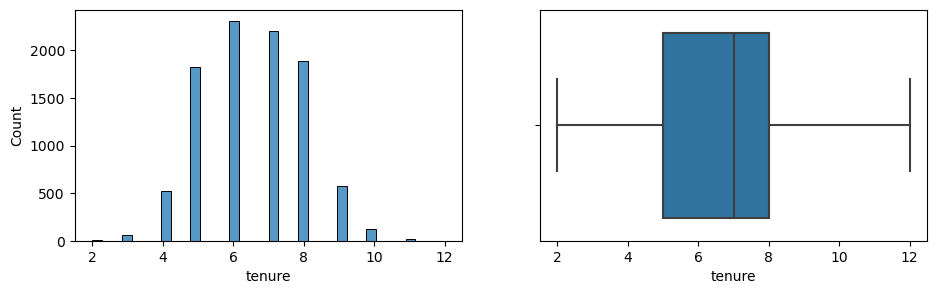

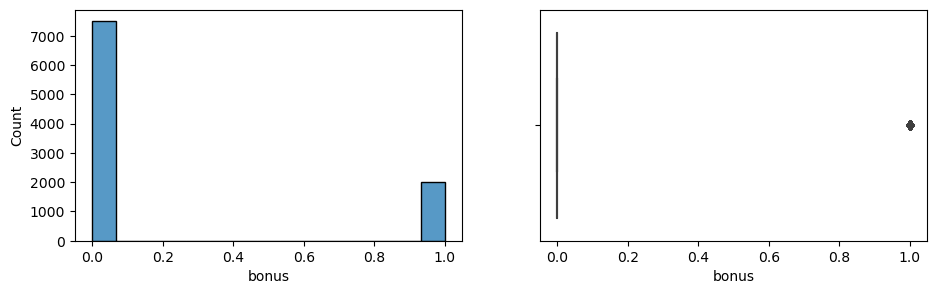

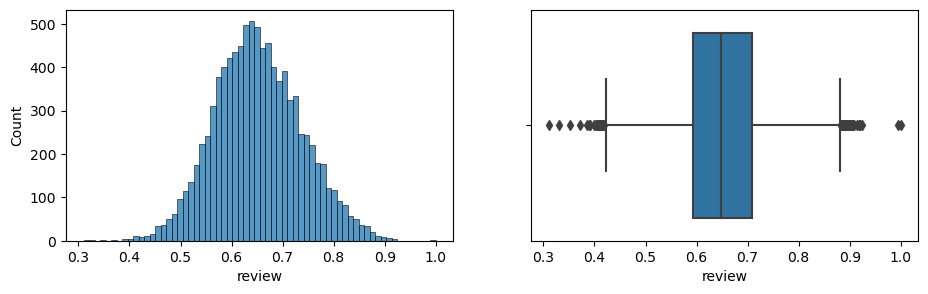

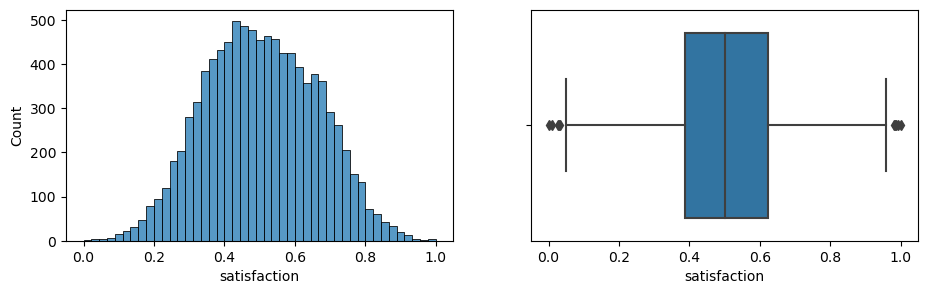

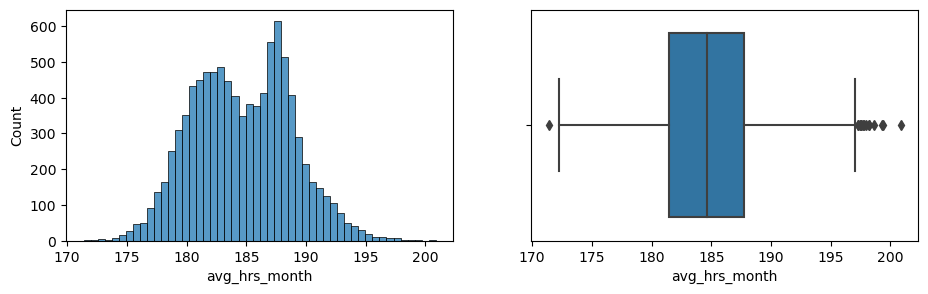

In [18]:
for col in ['projects', 'tenure', 'bonus', 'review', 'satisfaction','avg_hrs_month']:
    hist_box_plots(data_emp, col)
    


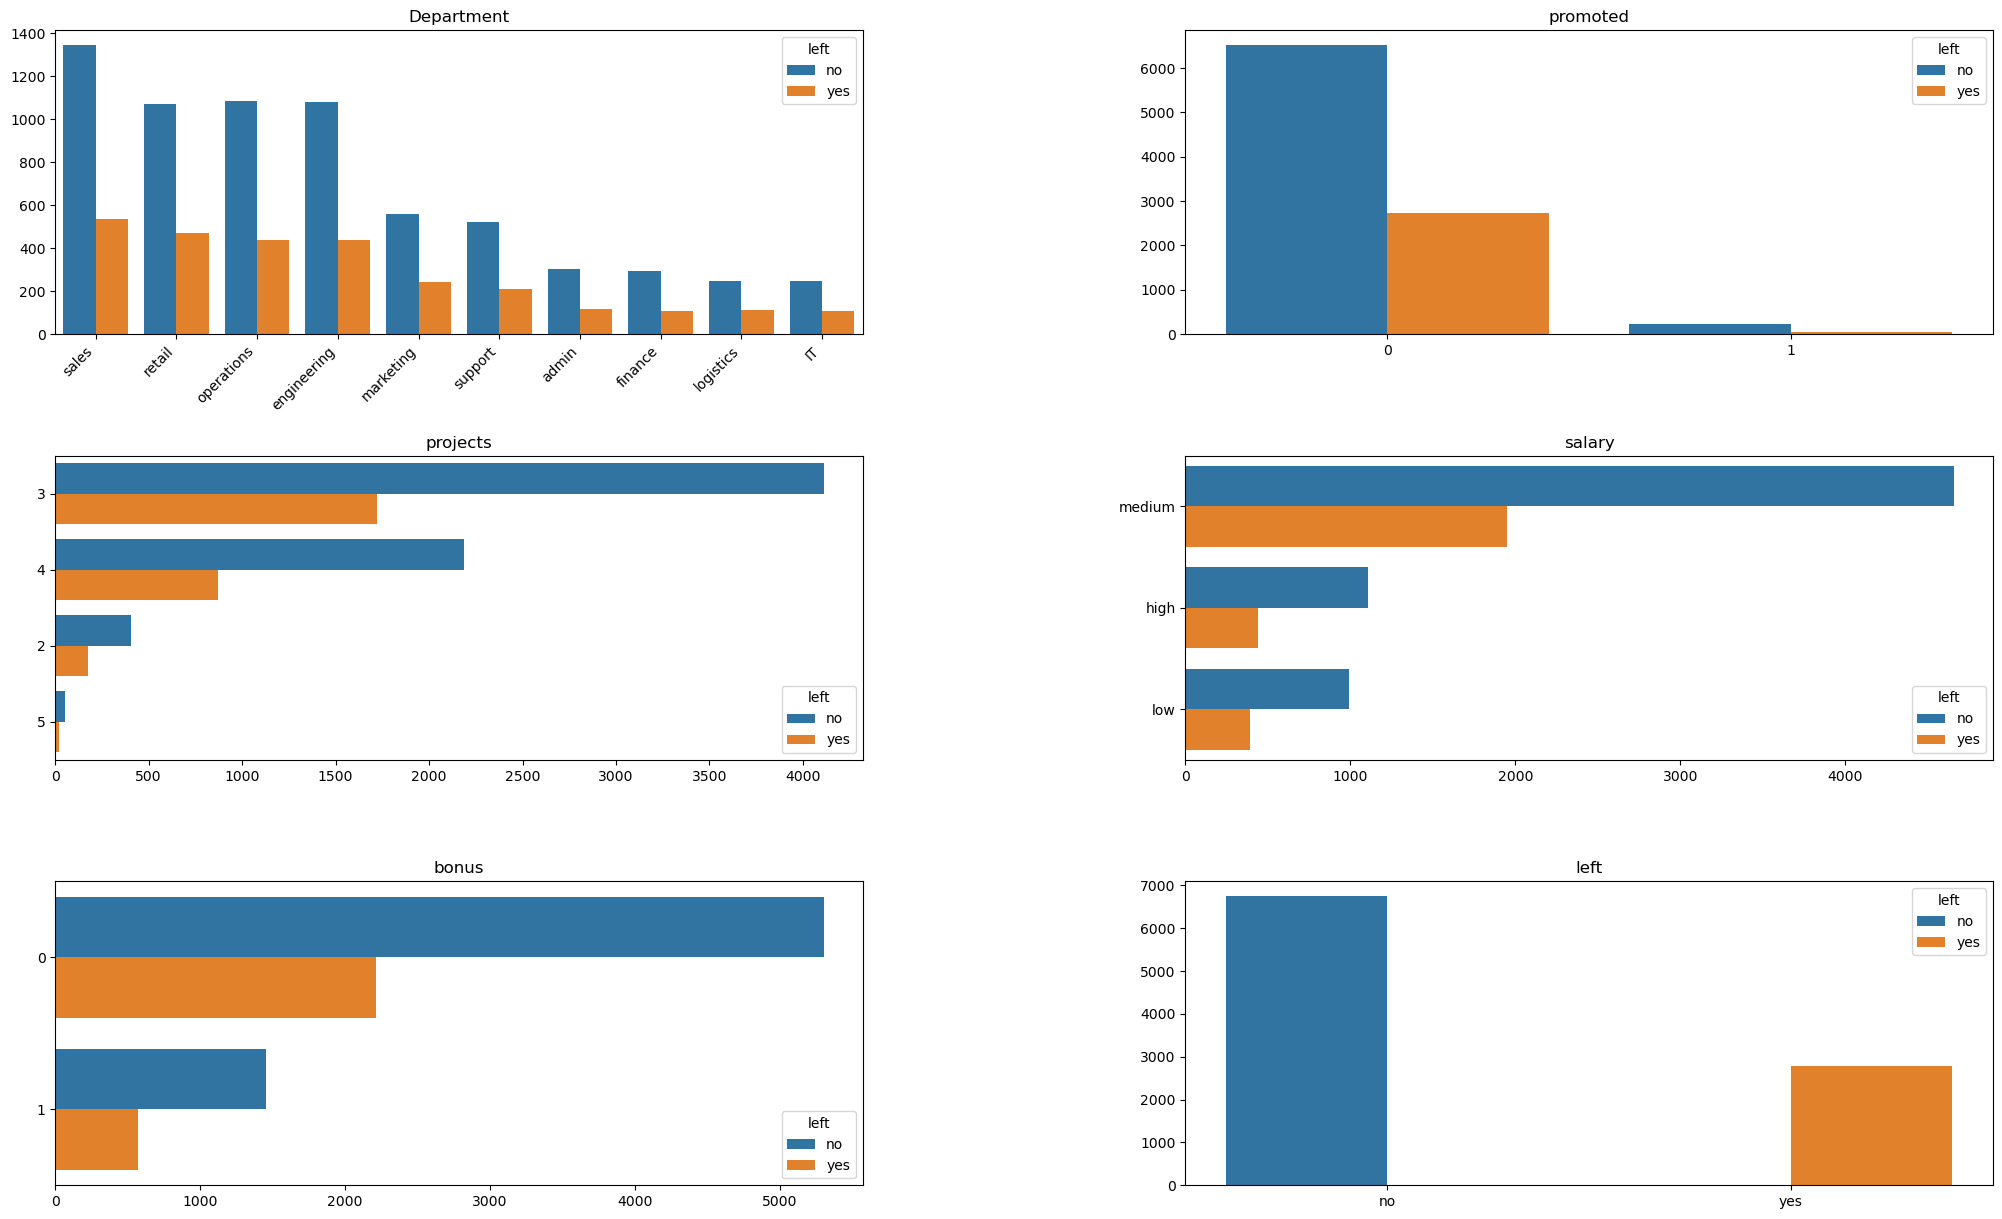

In [19]:


figure, axis = plt.subplots(ncols=2, nrows=3, figsize=(25,15))
plt.subplots_adjust(hspace = 0.4, wspace=0.4)

order = data_emp['department'].value_counts().index

g = sns.countplot(data=data_emp, x='department', hue='left',ax=axis[0, 0],order = data_emp['department'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')  # Rotating the x-axis labels by 45 degrees to avoid clumbsy
g.set_title('Department')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, x='promoted',hue='left', ax=axis[0, 1], order = data_emp['promoted'].value_counts().index)
g.title.set_text('promoted')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, y='projects', hue='left',ax=axis[1, 0],order = data_emp['projects'].value_counts().index)
g.title.set_text('projects')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, y='salary',hue='left', ax=axis[1, 1], order = data_emp['salary'].value_counts().index)
g.title.set_text('salary')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, y='bonus', hue='left',ax=axis[2, 0], order = data_emp['bonus'].value_counts().index)
g.title.set_text('bonus')
g.set(xlabel='')
g.set(ylabel='')

g = sns.countplot(data=data_emp, x='left', hue='left',ax=axis[2, 1], order = data_emp['left'].value_counts().index)
g.title.set_text('left')
g.set(xlabel='')
g.set(ylabel='')


plt.show()


In [20]:
X=data.drop('left', axis=1)  # Features (all columns except 'isFraud')
y=data['left']  # Target variable

# Model

# Logistic Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log = LogisticRegression()


In [22]:
# Instantiate the logistic regression model
log.fit(X_train, y_train)


LogisticRegression()

In [23]:
# Predicting labels for the test set
log_p = log.predict(X_test)

# Calculating the confusion matrix
log_m = confusion_matrix(log_p, y_test)
print("Confusion Matrix:\n", log_m)

# Calculating accuracy
log_acc = log_m.diagonal().sum() / log_m.sum() * 100
print("Accuracy:", log_acc)

# Calculating F1 score
f1_log = f1_score(y_test, log_p)
print("F1 Score:", f1_log)

Confusion Matrix:
 [[1285  483]
 [  45   95]]
Accuracy: 72.32704402515722
F1 Score: 0.2646239554317549


In [24]:
precision_log = 1285 / (1285 + 483)
recall_log = 1285 / (1285 + 45)

In [25]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
dt_p=dt.predict(X_test)
dt_m=confusion_matrix(dt_p,y_test)
print("Confusion Matrix:\n", dt_m)
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
print("Accuarcy",dt_acc)
f1_dt = f1_score(y_test, dt_p)
print("F1 Score",f1_dt)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1162  180]
 [ 168  398]]
Accuarcy 81.76100628930818
F1 Score 0.6958041958041957


In [27]:
precision_dt= 1163 / (1163 + 188)
recall_dt = 1163 / (1163 + 167)

# Random Forest

In [28]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
rf_p=rf.predict(X_test)
rf_m=confusion_matrix(rf_p,y_test)
print("Confusion Matrix:\n", rf_m)
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
print("Accuarcy",rf_acc)
f1_rf = f1_score(y_test, rf_p)
print("F1 Score",f1_rf)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1234  169]
 [  96  409]]
Accuarcy 86.11111111111111
F1 Score 0.7553093259464452


In [30]:
# Calculate Precision and Recall
precision_rf = 1234 / (1234 + 180)
recall_rf = 1234 / (1234 + 96)

# KNN

In [31]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
knn_p=knn.predict(X_test)
knn_m=confusion_matrix(knn_p,y_test)
print("Confusion Matrix:\n", knn_m)
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
print("Accuarcy",knn_acc)
f1_knn = f1_score(y_test, knn_p)
print("F1 Score",f1_knn)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1163  342]
 [ 167  236]]
Accuarcy 73.32285115303984
F1 Score 0.48114169215086644


In [33]:
precision_knn = 1163 / (1163 + 342)
recall_knn = 1163 / (1163 + 167)

# SVM

In [34]:
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [35]:
svm_p=svc.predict(X_test)
svm_m=confusion_matrix(svm_p,y_test)
print("Confusion Matrix:\n", svm_m)
svm_acc=svm_m.diagonal().sum()/svm_m.sum()*100
print("Accuarcy",svm_acc)
f1_svm = f1_score(y_test, svm_p)
print("F1 Score",f1_svm)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1330  578]
 [   0    0]]
Accuarcy 69.70649895178197
F1 Score 0.0


In [36]:
precision_svm= 1330 / (1330 + 578)
recall_svm = 1330 / (1330 + 0)

# XgBoost

In [37]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
# Predict labels for the test set
xgb_p = xgb.predict(X_test)

# Calculate the confusion matrix
xgb_m = confusion_matrix(xgb_p, y_test)
print("Confusion Matrix:\n", xgb_m)

# Calculate accuracy
xgb_acc = xgb_m.diagonal().sum() / xgb_m.sum() * 100
print("Accuracy:", xgb_acc)

# Calculate F1 score
f1_xgb = f1_score(y_test, xgb_p)
print("F1 Score:", f1_xgb)


Confusion Matrix:
 [[1221  167]
 [ 109  411]]
Accuracy: 85.53459119496856
F1 Score: 0.7486338797814207


In [39]:
precision_xgb = 1221 / (1221 + 167)
recall_xgb= 1221 / (1221 +109)

# Adaboost

In [40]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)


AdaBoostClassifier()

In [41]:
# Predicting labels for the test set
ada_p = ada.predict(X_test)

# Calculating the confusion matrix
ada_m = confusion_matrix(ada_p, y_test)
print("Confusion Matrix:\n", ada_m)

# Calculating accuracy
ada_acc = ada_m.diagonal().sum() / ada_m.sum() * 100
print("Accuracy:", ada_acc)

# Calculating F1 score
f1_ada = f1_score(y_test, ada_p)
print("F1 Score:", f1_ada)

Confusion Matrix:
 [[1208  328]
 [ 122  250]]
Accuracy: 76.41509433962264
F1 Score: 0.5263157894736842


In [42]:
precision_ada = 1208 / (1208 + 328)
recall_ada = 1208 / (1208 + 122)

In [43]:
# Define the models and their evaluation metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM','XGBoost','Adaboost']
accuracies = [log_acc, dt_acc, rf_acc, knn_acc, svm_acc,xgb_acc,ada_acc]
precisions = [precision_log, precision_dt, precision_rf, precision_knn, precision_svm,precision_xgb,precision_ada]
recalls = [recall_log, recall_dt, recall_rf, recall_knn, recall_svm,recall_xgb,recall_ada]
f1_scores = [f1_log, f1_dt, f1_rf, f1_knn, f1_svm,f1_xgb,f1_ada]


In [44]:

# Create a DataFrame from the lists
df_results = pd.DataFrame({'Model': models,'Accuracy': accuracies,'Precision': precisions,'Recall': recalls,'F1-Score': f1_scores})

# Print the DataFrame in tabular format
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,72.327044,0.726810,0.966165,0.264624
1,Decision Tree,81.761006,0.860844,0.874436,0.695804
2,Random Forest,86.111111,0.872702,0.927820,0.755309
3,KNN,73.322851,0.772757,0.874436,0.481142
4,SVM,69.706499,0.697065,1.000000,0.000000
5,XGBoost,85.534591,0.879683,0.918045,0.748634
6,Adaboost,76.415094,0.786458,0.908271,0.526316


# Class Imbalance

In [45]:
data.left.value_counts()

left
0    6756
1    2784
Name: count, dtype: int64

In [46]:
smote=SMOTE()
x_sm,y_sm=smote.fit_resample(X,y)

In [47]:
y_sm.value_counts()

left
0    6756
1    6756
Name: count, dtype: int64

# Outliers

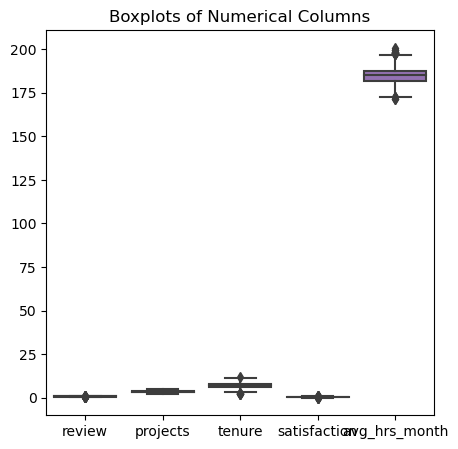

In [48]:
plt.figure(figsize=(5,5))
sns.boxplot(data=x_sm[['review','projects','tenure','satisfaction','avg_hrs_month']])
plt.title('Boxplots of Numerical Columns')
plt.show()

<Axes: xlabel='review', ylabel='Density'>

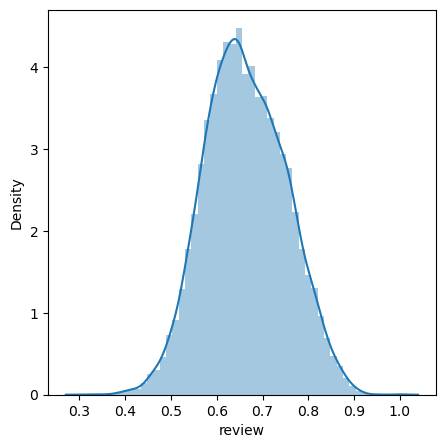

In [49]:
plt.figure(figsize=(5,5))
sns.distplot(x_sm["review"]) # Lets look the distribution , it seems to be Normal #1
#SD-If data distribution is normal


In [50]:
up_r=x_sm["review"].mean()+3*x_sm["review"].std()
lp_r=x_sm["review"].mean()-3*x_sm["review"].std()
print(up_r,lp_r)

0.9277455131232476 0.3976383028476528


In [51]:
x_sm.loc[x_sm["review"]>0.929,"review"]=0.929
x_sm.loc[x_sm["review"]<0.39,"review"]=0.39

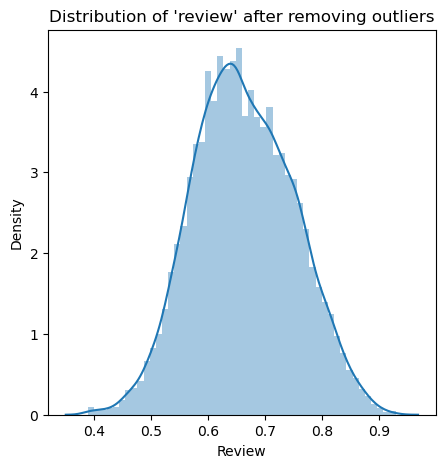

In [52]:


# Plot the distribution after removing outliers
plt.figure(figsize=(5,5))
sns.distplot(x_sm["review"])
plt.title("Distribution of 'review' after removing outliers")
plt.xlabel("Review")
plt.ylabel("Density")
plt.show()

<Axes: xlabel='projects', ylabel='Density'>

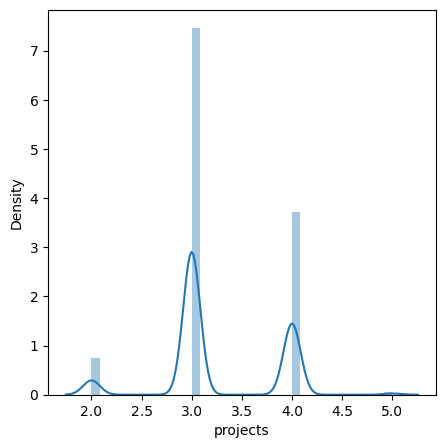

In [53]:
plt.figure(figsize=(5,5))
sns.distplot(x_sm["projects"]) 

In [54]:
mean_value = x_sm["projects"].mean()
std_dev = x_sm["projects"].std()

# Define the threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = x_sm[(x_sm["projects"] - mean_value).abs() > threshold * std_dev]

# Remove or cap outliers
# Option 1: Remove outliers
#cleaned_data = x_sm[(x_sm["projects"] - mean_value).abs() <= threshold * std_dev]

# Option 2: Cap outliers (replace with the mean or median)
x_sm.loc[(x_sm["projects"] - mean_value).abs() > threshold * std_dev, "projects"] = mean_value  # Replace outliers with mean


In [55]:
x_sm.shape

(13512, 9)

<Axes: xlabel='projects', ylabel='Count'>

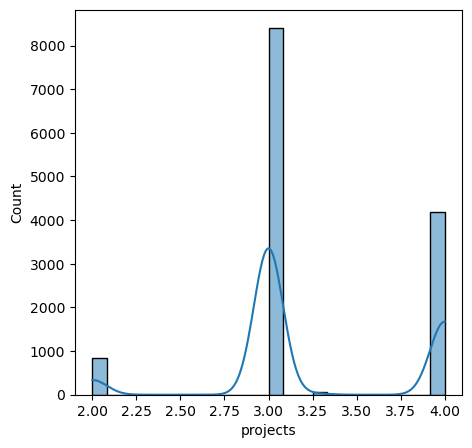

In [56]:
plt.figure(figsize=(5,5))
sns.histplot(x_sm["projects"], kde=True)


<Axes: xlabel='tenure', ylabel='Density'>

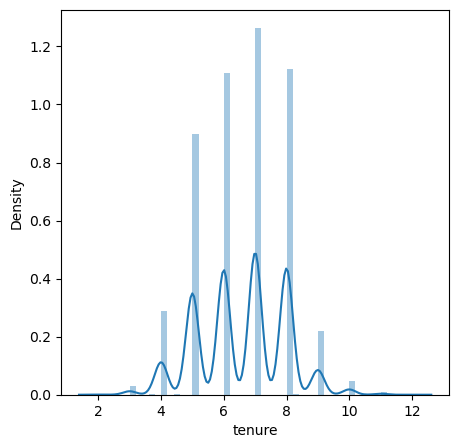

In [57]:
plt.figure(figsize=(5,5))
sns.distplot(x_sm["tenure"]) 

In [58]:
mean_value = x_sm["tenure"].mean()
std_dev = x_sm["tenure"].std()

# Define the threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = x_sm[(x_sm["tenure"] - mean_value).abs() > threshold * std_dev]

# Remove or cap outliers
# Option 1: Remove outliers
#cleaned_data = x_sm[(x_sm["tenure"] - mean_value).abs() <= threshold * std_dev]

# Option 2: Cap outliers (replace with the mean or median)

x_sm.loc[(x_sm["tenure"] - mean_value).abs() > threshold * std_dev, "tenure"] = mean_value  # Replace outliers with mean


<Axes: xlabel='tenure', ylabel='Count'>

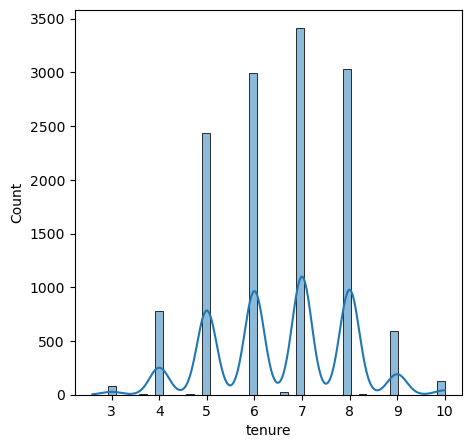

In [59]:
plt.figure(figsize=(5,5))
sns.histplot(x_sm["tenure"], kde=True)


<Axes: xlabel='satisfaction', ylabel='Density'>

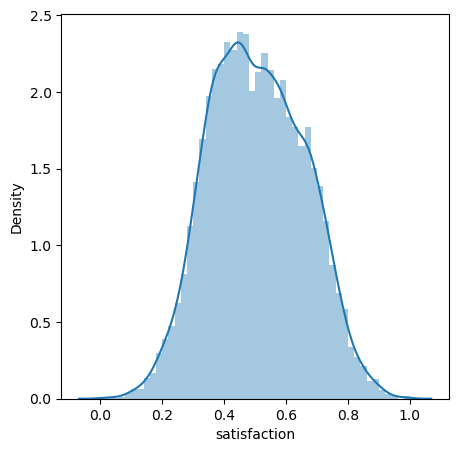

In [60]:
plt.figure(figsize=(5,5))
sns.distplot(x_sm["satisfaction"]) 

In [61]:
up_s=x_sm["satisfaction"].mean()+3*x_sm["satisfaction"].std()
lp_s=x_sm["satisfaction"].mean()-3*x_sm["satisfaction"].std()
print(up_s,lp_s)

0.9682298933028964 0.04314610454148193


In [62]:
x_sm.loc[x_sm["satisfaction"]>0.96,"review"]=0.96
x_sm.loc[x_sm["satisfaction"]<0.43,"review"]=0.43

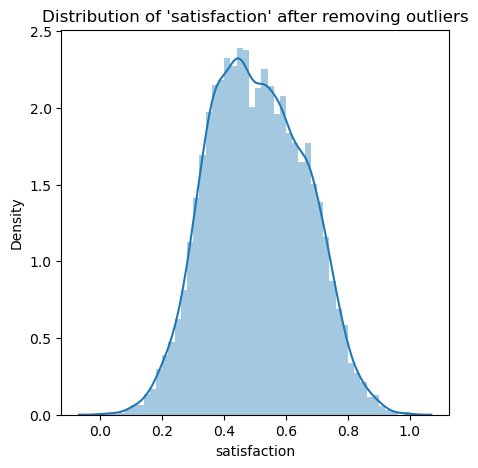

In [63]:


# Plot the distribution after removing outliers
plt.figure(figsize=(5,5))
sns.distplot(x_sm["satisfaction"])
plt.title("Distribution of 'satisfaction' after removing outliers")
plt.xlabel("satisfaction")
plt.ylabel("Density")
plt.show()

<Axes: xlabel='avg_hrs_month', ylabel='Density'>

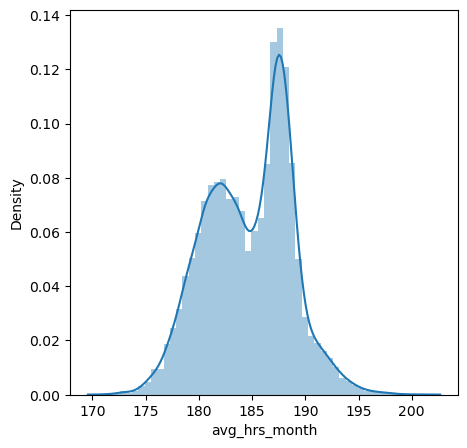

In [64]:
plt.figure(figsize=(5,5))
sns.distplot(x_sm["avg_hrs_month"],kde=True) 

In [65]:
mean_value = x_sm["avg_hrs_month"].mean()
std_dev = x_sm["avg_hrs_month"].std()

# Define the threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = x_sm[(x_sm["avg_hrs_month"] - mean_value).abs() > threshold * std_dev]

# Remove or cap outliers
# Option 1: Remove outliers
#cleaned_data = x_sm[(x_sm["avg_hrs_month"] - mean_value).abs() <= threshold * std_dev]
# Option 2: Cap outliers (replace with the mean or median)

x_sm.loc[(x_sm["avg_hrs_month"] - mean_value).abs() > threshold * std_dev, "avg_hrs_month"] = mean_value  # Replace outliers with mean


<Axes: xlabel='avg_hrs_month', ylabel='Density'>

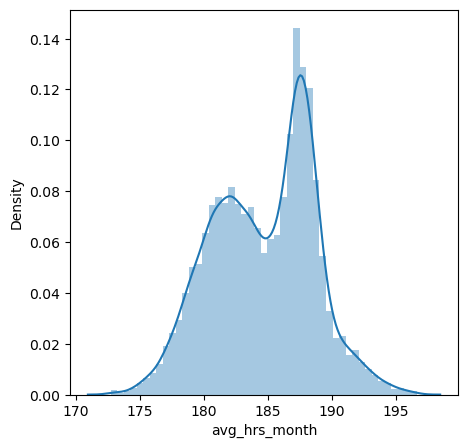

In [66]:
plt.figure(figsize=(5,5))
sns.distplot(x_sm["avg_hrs_month"]) # Lets look the distribution ,Now the outliers are removed


# Skewness

In [67]:
x_sm.skew()

department      -0.522856
promoted         6.486297
review           0.145065
projects        -0.000692
salary          -1.222986
tenure          -0.102397
satisfaction     0.084920
bonus            1.549852
avg_hrs_month   -0.123412
dtype: float64

# After outliers imbalnce treatment

In [68]:
Xx_train, Xx_test, yy_train, yy_test = train_test_split(x_sm,y_sm, test_size=0.2, random_state=42)
model_log_cl = LogisticRegression()

#x_sm,y_sm

# Logistic

In [69]:

model_log_cl.fit(Xx_train, yy_train)


LogisticRegression()

In [70]:
log_p_cl=model_log_cl.predict(Xx_test)
log_m_cl=confusion_matrix(log_p_cl,yy_test)
print("Confusion Matrix:\n", log_m_cl)
log_acc_cl=log_m_cl.diagonal().sum()/log_m_cl.sum()*100
print("Accuarcy",log_acc_cl)
f1_log_cl = f1_score(yy_test, log_p_cl)
print("F1 Score",f1_log_cl)


Confusion Matrix:
 [[602 516]
 [749 836]]
Accuarcy 53.20014798372179
F1 Score 0.5692883895131087


In [71]:
precision_log_cl = 898 / (898 + 400)
recall_log_cl = 898 / (898 + 453)

# Decision Tree

In [72]:
dt_cl=DecisionTreeClassifier()
dt_cl.fit(Xx_train, yy_train)

DecisionTreeClassifier()

In [73]:
dt_p_cl=dt_cl.predict(Xx_test)
dt_m_cl=confusion_matrix(dt_p_cl,yy_test)
print("Confusion Matrix:\n", dt_m_cl)
dt_acc_cl=dt_m_cl.diagonal().sum()/dt_m_cl.sum()*100
print("Accuarcy",dt_acc_cl)
f1_dt_cl = f1_score(yy_test, dt_p_cl)
print("F1 Score",f1_dt_cl)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1074  246]
 [ 277 1106]]
Accuarcy 80.65112837587866
F1 Score 0.8087751371115173


In [74]:
precision_dt_cl = 1118 / (1118 + 209)
recall_dt_cl = 1118 / (1118 + 233)

# Random Forest

In [75]:
rf_cl=RandomForestClassifier()
rf_cl.fit(Xx_train, yy_train)

RandomForestClassifier()

In [76]:
rf_p_cl=rf_cl.predict(Xx_test)
rf_m_cl=confusion_matrix(rf_p_cl,yy_test)
print("Confusion Matrix:\n", rf_m_cl)
rf_acc_cl=rf_m_cl.diagonal().sum()/rf_m_cl.sum()*100
print("Accuarcy",rf_acc_cl)
f1_rf_cl = f1_score(yy_test, rf_p_cl)
print("F1 Score",f1_rf_cl)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1155  167]
 [ 196 1185]]
Accuarcy 86.57047724750278
F1 Score 0.867178924259056


In [77]:
precision_rf_cl = 1178 / (1178 + 154)
recall_rf_cl = 1178 / (1178 + 173)

# KNN

In [78]:
knn_cl=KNeighborsClassifier()
knn_cl.fit(Xx_train,yy_train)

KNeighborsClassifier()

In [79]:
knn_p_cl=knn_cl.predict(Xx_test)
knn_m_cl=confusion_matrix(knn_p_cl,yy_test)
print("Confusion Matrix:\n", knn_m_cl)
knn_acc_cl=knn_m_cl.diagonal().sum()/knn_m_cl.sum()*100
print("Accuarcy",knn_acc_cl)
f1_knn_cl = f1_score(yy_test, knn_p_cl)
print("F1 Score",f1_knn_cl)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[ 909  259]
 [ 442 1093]]
Accuarcy 74.06585275619682
F1 Score 0.7571873917561482


In [80]:
precision_knn_cl = 902 / (902 + 229)
recall_knn_cl = 902 / (902 + 449)

# SVM

In [81]:
svc_cl=SVC()
svc_cl.fit(Xx_train,yy_train)

SVC()

In [82]:
svm_p_cl=svc_cl.predict(Xx_test)
svm_m_cl=confusion_matrix(svm_p_cl,yy_test)
print("Confusion Matrix:\n", svm_m_cl)
svm_acc_cl=svm_m_cl.diagonal().sum()/svm_m_cl.sum()*100
print("Accuarcy",svm_acc_cl)
f1_svm_cl = f1_score(yy_test,svm_p_cl)
print("F1 Score",f1_svm_cl)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1268 1349]
 [  83    3]]
Accuarcy 47.021827598964116
F1 Score 0.004172461752433936


In [83]:
precision_svm_cl = 1342 / (1342 + 1352)
recall_svm_cl = 1342 / (1342 + 9)

# XGBoost

In [84]:
xgb_cl = XGBClassifier()
xgb_cl.fit(Xx_train, yy_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
xgb_p_cl = xgb_cl.predict(Xx_test)

# Calculate the confusion matrix
xgb_m_cl = confusion_matrix(yy_test, xgb_p_cl)
print("Confusion Matrix:\n", xgb_m_cl)

# Calculate accuracy
xgb_acc_cl = (accuracy_score(yy_test,xgb_p_cl))*100
print("Accuracy:", xgb_acc_cl)

# Calculate F1 score
f1_xgb_cl = f1_score(yy_test, xgb_p_cl)
print("F1 Score:", f1_xgb_cl)

Confusion Matrix:
 [[1141  210]
 [ 207 1145]]
Accuracy: 84.57269700332964
F1 Score: 0.8459549316586628


In [86]:
precision_xgb_cl = 1165 / (1165 + 186)
recall_xgb_cl = 1165 / (1165 +167)

# AdaBoost

In [87]:
ada_cl = AdaBoostClassifier()
ada_cl.fit(Xx_train, yy_train)


AdaBoostClassifier()

In [88]:
ada_p_cl = ada_cl.predict(Xx_test)
ada_m_cl=confusion_matrix(ada_p_cl,yy_test)
print("Confusion Matrix:\n", ada_m_cl)
ada_acc_cl=ada_m_cl.diagonal().sum()/ada_m_cl.sum()*100
print("Accuarcy",ada_acc_cl)
f1_ada_cl = f1_score(yy_test,ada_p_cl)
print("F1 Score",f1_ada_cl)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1048  488]
 [ 303  864]]
Accuarcy 70.73621901590825
F1 Score 0.6859865025803891


In [89]:
precision_ada_cl = 1071 / (1071 + 248)
recall_ada_cl = 1071 / (1071 + 280)

# Comparing

In [90]:
# Definimg the models and their evaluation metrics
models_cl = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM','XGBoost','AdaBoost']
accuracies_cl = [log_acc_cl, dt_acc_cl, rf_acc_cl, knn_acc_cl, svm_acc_cl,xgb_acc_cl,ada_acc_cl]
precisions_cl = [precision_log_cl, precision_dt_cl, precision_rf_cl, precision_knn_cl, precision_svm_cl,precision_xgb_cl,precision_ada_cl]
recalls_cl = [recall_log_cl, recall_dt_cl, recall_rf_cl, recall_knn_cl, recall_svm_cl,recall_xgb_cl,recall_ada_cl]
f1_scores_cl = [f1_log_cl, f1_dt_cl, f1_rf_cl, f1_knn_cl, f1_svm_cl,f1_xgb_cl,f1_ada_cl]


In [91]:

# Create a DataFrame from the lists
df_results_cl = pd.DataFrame({'Model': models_cl,'Accuracy': accuracies_cl,'Precision': precisions_cl,'Recall': recalls_cl,'F1-Score': f1_scores_cl})

# Print the DataFrame in tabular format
df_results_cl

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,53.200148,0.691834,0.664693,0.569288
1,Decision Tree,80.651128,0.842502,0.827535,0.808775
2,Random Forest,86.570477,0.884384,0.871947,0.867179
3,KNN,74.065853,0.797524,0.667654,0.757187
4,SVM,47.021828,0.498144,0.993338,0.004172
5,XGBoost,84.572697,0.862324,0.874625,0.845955
6,AdaBoost,70.736219,0.811979,0.792746,0.685987


# Feature Selection 

In [92]:
#Here we see Random Forest performing better

In [93]:

rf_cl.feature_importances_

array([0.06278306, 0.00575089, 0.15933076, 0.02452777, 0.02292124,
       0.07706614, 0.32910103, 0.01190284, 0.30661628])

In [94]:
fs=pd.DataFrame({"importances":list(rf.feature_importances_),"columns":list(x_sm)})
fs
# We see promoted Salary projects and Bonus are least important

,importances,columns
0,0.050794,department
1,0.003412,promoted
2,0.257771,review
3,0.021996,projects
4,0.018392,salary
5,0.075518,tenure
6,0.298100,satisfaction
7,0.012114,bonus
8,0.261905,avg_hrs_month


In [95]:
rf_data=x_sm.copy()

In [96]:
rf_data.drop('promoted', axis=1, inplace=True)
rf_data.drop('projects', axis=1, inplace=True)
rf_data.drop('salary', axis=1, inplace=True)
rf_data.drop('bonus', axis=1, inplace=True)

# Random Forest 

In [97]:
Xxf_train, Xxf_test, yyf_train, yyf_test = train_test_split(rf_data,y_sm, test_size=0.2, random_state=42)


In [98]:
rf_fs=RandomForestClassifier()
rf_fs.fit(Xxf_train, yyf_train)

RandomForestClassifier()

In [99]:
rf_p_fs=rf_fs.predict(Xxf_test)
rf_m_fs=confusion_matrix(rf_p_fs,yyf_test)
print("Confusion Matrix:\n", rf_m_fs)
rf_acc_fs=rf_m_fs.diagonal().sum()/rf_m_fs.sum()*100
print("Accuarcy",rf_acc_fs)
f1_rf_fs = f1_score(yyf_test, rf_p_fs)
print("F1 Score",f1_rf_fs)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1119  189]
 [ 232 1163]]
Accuarcy 84.42471328153903
F1 Score 0.8467419002548235


In [100]:
precision_rf_cl_fs = 1123 / (1123 + 201)
recall_rf_cl_fs = 1123 / (1123 + 228)

# Logistic

In [101]:
model_log_cl_fs = LogisticRegression()

model_log_cl_fs.fit(Xxf_train, yyf_train)


LogisticRegression()

In [102]:
log_p_cl_fs=model_log_cl_fs.predict(Xxf_test)
log_m_cl_fs=confusion_matrix(log_p_cl_fs,yyf_test)
print("Confusion Matrix:\n", log_m_cl_fs)
log_acc_cl_fs=log_m_cl_fs.diagonal().sum()/log_m_cl_fs.sum()*100
print("Accuarcy",log_acc_cl_fs)
f1_log_cl_fs = f1_score(yyf_test, log_p_cl_fs)
print("F1 Score",f1_log_cl_fs)


Confusion Matrix:
 [[849 706]
 [502 646]]
Accuarcy 55.308916019237884
F1 Score 0.5168


In [103]:
precision_log_cl_fs = 850 / (850 + 751)
recall_log_cl_fs = 850 / (850 + 501)

# Decision tree

In [104]:
dt_cl_fs=DecisionTreeClassifier()
dt_cl_fs.fit(Xxf_train, yyf_train)

DecisionTreeClassifier()

In [105]:
dt_p_cl_fs=dt_cl_fs.predict(Xxf_test)
dt_m_cl_fs=confusion_matrix(dt_p_cl_fs,yyf_test)
print("Confusion Matrix:\n", dt_m_cl_fs)
dt_acc_cl_fs=dt_m_cl_fs.diagonal().sum()/dt_m_cl_fs.sum()*100
print("Accuarcy",dt_acc_cl_fs)
f1_dt_cl_fs = f1_score(yyf_test, dt_p_cl_fs)
print("F1 Score",f1_dt_cl_fs)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1069  248]
 [ 282 1104]]
Accuarcy 80.3921568627451
F1 Score 0.8064280496712929


In [106]:
precision_dt_cl_fs = 1050 / (1050 + 271)
recall_dt_cl_fs = 1050 / (1050 + 301)

# KNN

In [107]:
knn_cl_fs=KNeighborsClassifier()
knn_cl_fs.fit(Xxf_train,yyf_train)

KNeighborsClassifier()

In [108]:
knn_p_cl_fs=knn_cl_fs.predict(Xxf_test)
knn_m_cl_fs=confusion_matrix(knn_p_cl_fs,yyf_test)
print("Confusion Matrix:\n", knn_m_cl_fs)
knn_acc_cl_fs=knn_m_cl_fs.diagonal().sum()/knn_m_cl_fs.sum()*100
print("Accuarcy",knn_acc_cl_fs)
f1_knn_cl_fs = f1_score(yyf_test, knn_p_cl_fs)
print("F1 Score",f1_knn_cl_fs)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1023  223]
 [ 328 1129]]
Accuarcy 79.61524232334443
F1 Score 0.8038447846208615


In [109]:
precision_knn_cl_fs = 1038 / (1038 + 225)
recall_knn_cl_fs = 1038 / (1038 + 313)

# XG boost

In [110]:
xgb_cl_fs = XGBClassifier()
xgb_cl_fs.fit(Xxf_train, yyf_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [111]:
xgb_p_cl_fs = xgb_cl_fs.predict(Xxf_test)

# Calculate the confusion matrix
xgb_m_cl_fs = confusion_matrix(yyf_test, xgb_p_cl_fs)
print("Confusion Matrix:\n", xgb_m_cl_fs)

# Calculate accuracy
xgb_acc_cl_fs = (accuracy_score(yyf_test,xgb_p_cl_fs))*100
print("Accuracy:", xgb_acc_cl_fs)

# Calculate F1 score
f1_xgb_cl_fs = f1_score(yyf_test, xgb_p_cl_fs)
print("F1 Score:", f1_xgb_cl_fs)

Confusion Matrix:
 [[1105  246]
 [ 208 1144]]
Accuracy: 83.20384757676655
F1 Score: 0.8344274252370532


In [112]:
precision_xg_cl_fs = 1121 / (1121 + 230)
recall_xg_cl_fs = 1121 / (1121 + 223)

# SVM

In [113]:
svc_cl_fs=SVC()
svc_cl_fs.fit(Xxf_train,yyf_train)

SVC()

In [114]:
svm_p_cl_fs=svc_cl_fs.predict(Xxf_test)
svm_m_cl_fs=confusion_matrix(svm_p_cl_fs,yyf_test)
print("Confusion Matrix:\n", svm_m_cl_fs)
svm_acc_cl_fs=svm_m_cl_fs.diagonal().sum()/svm_m_cl_fs.sum()*100
print("Accuarcy",svm_acc_cl_fs)
f1_svm_cl_fs = f1_score(yyf_test,svm_p_cl_fs)
print("F1 Score",f1_svm_cl_fs)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1170 1341]
 [ 181   11]]
Accuarcy 43.692193858675545
F1 Score 0.014248704663212434


In [115]:
precision_svm_cl_fs = 1329 / (1329 + 1351)
recall_svm_cl_fs = 1329 / (1329 + 22)

# ADAboost

In [116]:
ada_cl_fs = AdaBoostClassifier()
ada_cl_fs.fit(Xxf_train, yyf_train)


AdaBoostClassifier()

In [117]:
ada_p_cl_fs = ada_cl_fs.predict(Xxf_test)
ada_m_cl_fs=confusion_matrix(ada_p_cl_fs,yyf_test)
print("Confusion Matrix:\n", ada_m_cl_fs)
ada_acc_cl_fs=ada_m_cl_fs.diagonal().sum()/ada_m_cl_fs.sum()*100
print("Accuarcy",ada_acc_cl_fs)
f1_ada_cl_fs = f1_score(yyf_test,ada_p_cl_fs)
print("F1 Score",f1_ada_cl_fs)
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)

Confusion Matrix:
 [[1056  499]
 [ 295  853]]
Accuarcy 70.6252312245653
F1 Score 0.6824


In [118]:
precision_ada_cl_fs = 1040 / (1040 + 459)
recall_ada_cl_fs = 1040 / (1040 + 311)

In [119]:
# Definimg the models and their evaluation metrics
models_cl_fs= ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM','XGBoost','AdaBoost']
accuracies_cl_fs = [log_acc_cl_fs, dt_acc_cl_fs, rf_acc_fs, knn_acc_cl_fs, svm_acc_cl_fs,xgb_acc_cl_fs,ada_acc_cl_fs]
precisions_cl_fs = [precision_log_cl_fs, precision_dt_cl_fs, precision_rf_cl_fs, precision_knn_cl_fs, precision_svm_cl_fs,precision_xg_cl_fs,precision_ada_cl_fs]
recalls_cl_fs = [recall_log_cl_fs, recall_dt_cl_fs, recall_rf_cl_fs, recall_knn_cl_fs, recall_svm_cl_fs,recall_xg_cl_fs,recall_ada_cl_fs]
f1_scores_cl_fs = [f1_log_cl_fs, f1_dt_cl_fs, f1_rf_fs, f1_knn_cl_fs, f1_svm_cl_fs,f1_xgb_cl_fs,f1_ada_cl_fs]


In [120]:

# Create a DataFrame from the lists
df_results_cl_fs = pd.DataFrame({'Model': models_cl_fs,'Accuracy': accuracies_cl_fs,'Precision': precisions_cl_fs,'Recall': recalls_cl_fs,'F1-Score': f1_scores_cl_fs})

# Print the DataFrame in tabular format
df_results_cl_fs

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,55.308916,0.530918,0.629164,0.516800
1,Decision Tree,80.392157,0.794852,0.777202,0.806428
2,Random Forest,84.424713,0.848187,0.831236,0.846742
3,KNN,79.615242,0.821853,0.768320,0.803845
4,SVM,43.692194,0.495896,0.983716,0.014249
5,XGBoost,83.203848,0.829756,0.834077,0.834427
6,AdaBoost,70.625231,0.693796,0.769800,0.682400
